<a href="https://colab.research.google.com/github/songchaneui/Hands-on-ML/blob/main/Hands_on_ML__ch4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##4.1.1 정규방정식
-> Loss 함수를 최소화하는 θ값을 찾기 위함

In [ ]:
#랜덤 선형 데이터 생성
import numpy as np

np.random.seed(42)
m = 100
X = 2*np.random.rand(m,1) #열벡터, 0~1까지 난수 생성
y = 4 + 3*X + np.random.randn(m,1)

In [ ]:
random = np.random.rand(m,1)
print(random)

[[0.7948113 ]
 [0.50263709]
 [0.57690388]
 [0.49251769]
 [0.19524299]
 [0.72245212]
 [0.28077236]
 [0.02431597]
 [0.6454723 ]
 [0.17711068]
 [0.94045858]
 [0.95392858]
 [0.91486439]
 [0.3701587 ]
 [0.01545662]
 [0.92831856]
 [0.42818415]
 [0.96665482]
 [0.96361998]
 [0.85300946]
 [0.29444889]
 [0.38509773]
 [0.85113667]
 [0.31692201]
 [0.16949275]
 [0.55680126]
 [0.93615477]
 [0.6960298 ]
 [0.57006117]
 [0.09717649]
 [0.61500723]
 [0.99005385]
 [0.14008402]
 [0.51832965]
 [0.87737307]
 [0.74076862]
 [0.69701574]
 [0.70248408]
 [0.35949115]
 [0.29359184]
 [0.80936116]
 [0.81011339]
 [0.86707232]
 [0.91324055]
 [0.5113424 ]
 [0.50151629]
 [0.79829518]
 [0.64996393]
 [0.70196688]
 [0.79579267]
 [0.89000534]
 [0.33799516]
 [0.37558295]
 [0.09398194]
 [0.57828014]
 [0.03594227]
 [0.46559802]
 [0.54264463]
 [0.28654125]
 [0.59083326]
 [0.03050025]
 [0.03734819]
 [0.82260056]
 [0.36019064]
 [0.12706051]
 [0.52224326]
 [0.76999355]
 [0.21582103]
 [0.62289048]
 [0.08534746]
 [0.05168172]
 [0.53

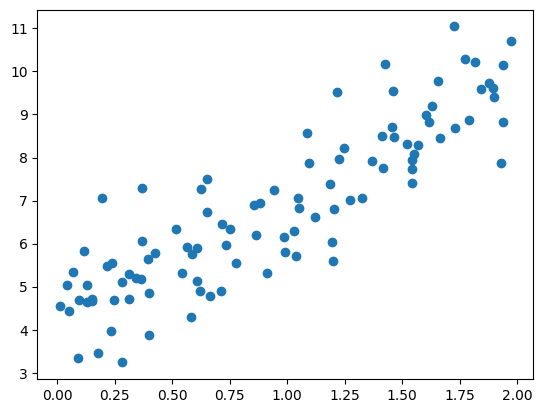

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(X,y)
plt.show()

In [ ]:
from sklearn.preprocessing import add_dummy_feature
X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y  #@는 행렬 곱셈

In [ ]:
print(theta_best) #theta0 & theta1

[[4.21509616]
 [2.77011339]]


In [ ]:
X_new = np.array([[0],[2]])
X_new_b = add_dummy_feature(X_new) #각 샘플에 x0 = 1을 추가
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

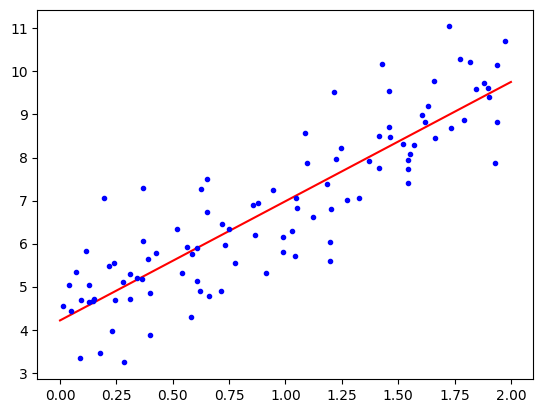

In [ ]:
import matplotlib.pyplot as plt
plt.plot(X_new, y_predict, "r-",label="예측")
plt.plot(X,y,"b.")
plt.show()

##4.1.2 계산복잡도

정규방정은 (n+1) X (n+1) 크기의 역행렬을 계산함.

=> 역행렬의 계산 복잡도는 n**2 ~ n**3사이임

# 4.2 경사하강법
--> 일반적인 최적화 알고리즘


idea) loss함수를 최소화하기 위해 모델의 파라미터를 반복해서 조정함.

중요 parameter_) 스텝의 크기 = 학습률 하이퍼 파라미터


학습률이 작으면, 최적화 theta를 찾기 위한 반복이 너무 많아져 시간이 오래걸림


학습률이 크면, 미분값이 0이 되는 지점을 지날 가능성이 있음.

GD를 사용할 때에는, 데이터의 모든 특성의 스케일을 같게 만들어야 함.

-> Standard Scaler


##4.2.1 배치 경사 하강법

먼저 경사하강법을 구현하기 위해서는, 각 모델 파라미터 theta에 대한 비용함수의 그레이디언트를 모두 구해야함.

이를 편도함수라고 하고 각 비용함수의 편도함수를 모두 구하는 공식을 활용함

In [ ]:
#경사 하강법의 스텝
eta = 0.1 #learing rate
n_epochs = 1000
m = len(X_b) #샘플 개수
np.random.seed(42)
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
  gradients = 2/m * X_b.T @ (X_b @ theta -y)
  theta = theta - eta*gradients

In [ ]:
theta

array([[4.21509616],
       [2.77011339]])

**적절한 학습률 설정을 통해 최적의 theta값을 찾아야 함. => Grid Search 활용**

##4.2.2 확률적 경사 하강법

*배치 경사 하강법 : 매 스텝 마다 전체 훈련 세트를 사용해 그레디언트를 계산함 -> 훈련 세트가 커짐에 따라 계산량이 너무 많아진다는 문제 발생


*확률적 경사 하강법 : 매 스텝에서 한 개의 샘플을 랜덤으로 선택하고 그 하나의 샘플에 대한 그레디언트를 계산한다.

--> 알고리즘의 속도가 빠름.(매우 큰 훈련세트에 용이) **But** Loss 함수가 최소가 될 때까지 매우 불규칙하게 움직이면서 평균적으로 감소함.


매우 불규칙하다는 것 = 지역 최솟값을 건너 뛰도록 도와주며, 배치 경사하강법 보다 전역 최솟값을 찾을 가능성이 높다.

In [ ]:
#학습 스케줄 : 매 반복에서 학습률을 결정하는 함수
#학습 스케줄을 사용한 SGD 구현 코드

n_epochs = 50
t0, t1 = 5, 50
def learning_schedule(t):
  return t0 / (t+t1)

np.random.seed(42)
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
  for iteration in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index: random_index + 1]
    yi = y[random_index : random_index +1]
    gradients = 2 * xi.T @ (xi @ theta - yi)
    eta = learning_schedule(epoch * m + iteration)
    theta = theta - eta * gradients


In [ ]:
theta

array([[4.21076011],
       [2.74856079]])

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-5, penalty = None, eta0=0.01, n_iter_no_change=100, random_state=42)
sgd_reg.fit(X,y.ravel()) #ravel(): 다차원 배열을 1차원 배열로펴주는 numpy함수. <-> reshape()


SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [ ]:
sgd_reg.intercept_,sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

##4.2.3 미니배치 경사 하강법

**미니 배치**라 부르는 임의의 작은 샘플 세트에 대해 그레디언트를 계산함.


---



*SGD에 비해 미니 배치 경사하강법은

-> GPU를 사용하여 성능 향상을 시킬 수 있음.

-> 미니배치를 어느정도 크게 하면 SGD보다 덜 불규칙적





#4.3 다항 회귀

In [ ]:
np.random.seed(42)
m=100
X=6*np.random.rand(m,1) - 3
y = 0.5*X**2 + X + 2 + np.random.randn(m,1)
print(X.shape)

(100, 1)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias = False)
X_poly = poly_features.fit_transform(X)
print("X[0] is", X[0])
print("X_poly[0] is ", X_poly[0])

X[0] is [-0.75275929]
X_poly[0] is  [-0.75275929  0.56664654]


In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_,lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

-> 선형회귀로 예측한 모델 : y = 0.56*x^2 + 0.93*x + 1.78

**- 다항회귀는 특성이 여러개 일때 (x1,x2,...) 특성 사이의 관계를 찾을 수 있음.**
    
    -> 주어진 차수까지 특성 간의 모든 교차항을 추가함. degree 파라미터가 3일때 x1*x2, x1^2*x2, x1*x2^2도 특성으로 추가하기 때문.

#4.4 학습 곡선

과대적합 & 과소적합을 확인하는 방법 중 하나가 **학습 곡선**을 확인하는 것임.

*학습곡선 : 모델의 훈련 오차와 검증 오차를 훈련 반복 횟수의 함수로 나타낸 그래프

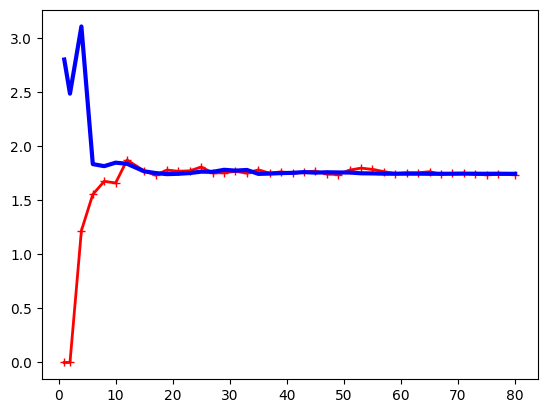

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(),X,y,train_sizes=np.linspace(0.01,1.0,40),cv=5,
    scoring="neg_root_mean_squared_error"
    )
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+",linewidth=2,label="훈련 세트")
plt.plot(train_sizes,valid_errors, "b-",linewidth=3,label="검증 세트")
plt.show()

이 모델은 과소 적합임


*   훈련 오차) 비선형적이며 곡선이 어느정도 평편해질 때까지 오차가 계속해서 상승함.
*   검증 오차) 초기에 검증 오차가 매우 큼. 훈련 샘플이 추가 됨에 따라 검증 오차가 천천히 감소함.
  
  -> 두 곡선이 수평한 구간을 만들고 꽤 높은 오차에 가까이 근접해있기 때문에 과소적합 모델의 전형적인 모습.



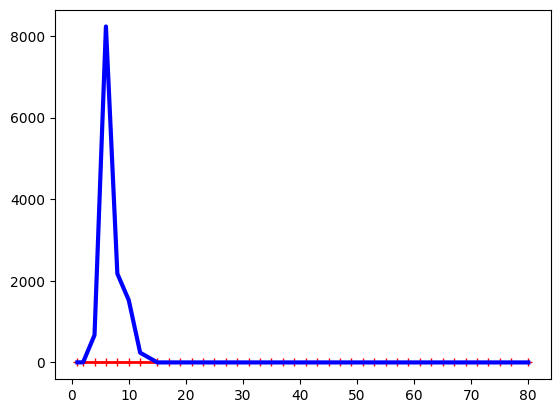

In [ ]:
#같은 데이터에서 10차 다항 회귀 모델의 학습 곡선
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias = False),
    LinearRegression()
)

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression,X,y,train_sizes=np.linspace(0.01,1.0,40),cv=5,
    scoring="neg_root_mean_squared_error"
    )
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+",linewidth=2,label="훈련 세트")
plt.plot(train_sizes,valid_errors, "b-",linewidth=3,label="검증 세트")
plt.show()

#4.5 규제가 있는 선형 모델

과대적합을 줄이는 좋은 방법은 모델을 규제 하는 것.



1.   릿지 회귀
2.   라쏘 회귀
3. 엘라스틱넷 회귀



##4.5.1 릿지 회귀

==> 규제가 추가된 선형 회귀 버전

규제항을 MSE에 추가하여 모델의 가중치가 가능한 한 작게 유지되도록 함.

+) 규제항은 훈련하는 동안에만 loss함수에 추가되며, 모델의 성능은 규제항이 없는 MSE(or RMSE)로 평가함

!! 릿지 회귀는 입력 특성의 스케일에 민감하기 때문에 훈련전, 데이터 스케일링을 거쳐져야함.(모든 규제가 있는 모델에도 대부분 해당됨.)

In [ ]:
#정규 방정식을 사용한 릿지 회귀
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.1,solver = "cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([4.82899748])

In [ ]:
#확률적 경사 하강법을 사용한 릿지 회귀
sgd_reg = SGDRegressor(penalty="l2",alpha=0.1/m,tol=None,
                       max_iter=1000, eta0=0.01,random_state=42)
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([4.82830117])

##4.5.2 라쏘 회귀

선형 회귀의 또 다른 규제된 버전


*   덜 중요한 특성의 가중치를 제거하려고 함 -> 자동으로 특성 선택을 수행하고 희소 모델을 만든다.
*



In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([4.77621741])

In [ ]:
SGD_lasso = SGDRegressor(penalty='l1',alpha=0.1)
SGD_lasso.fit(X,y)
SGD_lasso.predict([[1.5]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([4.75312959])

##4.5.3 엘라스틱넷

릿지 회귀와 라쏘 회귀를 절충한 모델.

규제항) 릿지와 회귀의 규제항을 단순히 더함. + 혼합 비율 r을 사용해 혼합 정도를 조정함.

-->   r=0 이면 릿지 회귀와 같아지고, r=1이면 라쏘 회귀와 같아짐

특성 수가 훈련 샘플 수보다 많거나 특성 몇 개가 강하게 연관 있을 때, 엘라스틱넷이 좋음(*라쏘는 문제를 일으킴)

In [ ]:
#ElasticNet
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1,l1_ratio=0.5) #l1_ration = 혼합 비율 r
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([4.78114505])

##4.5.4 조기종료

* 검증 오차가 최솟값에 도달하면 바로 훈련 중지시킴.

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame = True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
iris.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
len(iris.data)

150

In [ ]:
iris.target.head()

,target
0,0
1,0
2,0
3,0
4,0


In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris.target[51:56]

,target
51,1
52,1
53,1
54,1
55,1


In [ ]:
#데이터 분할 후 로지스틱 회귀 모델 훈련
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X=iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train,y_train)

LogisticRegression(random_state=42)

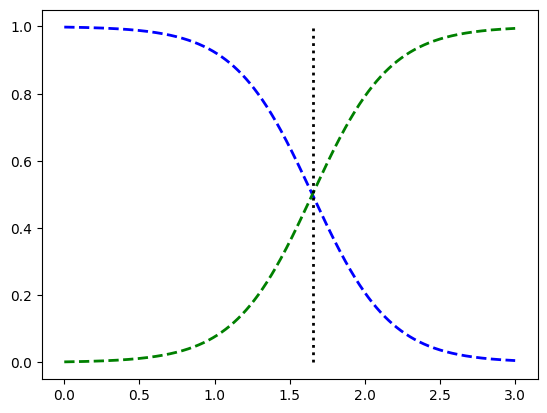

In [ ]:
#꽃잎 너비 0~3cm 꽃에 대해 모델 확률 계산
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:,1]>=0.5][0,0]

plt.plot(X_new, y_proba[:,0],"b--",linewidth=2,
         label = "Iris-Virginica가 아닐 확률")
plt.plot(X_new, y_proba[:,1],"g--",linewidth=2,
         label = "Iris-Virginica일 확률")
plt.plot([decision_boundary, decision_boundary],[0,1],"k:",linewidth=2,label="결정 경계")
plt.show()

In [ ]:
decision_boundary

1.6516516516516517

In [ ]:
log_reg.predict([[1.7],[1.5]])

array([ True, False])

로지스틱 회귀의 규제 강도를 조절하는 파라미터는 alpha가 아닌 그 역수에 해당하는 C이다.

##4.6.4 소프트 맥스 회귀

--> 여러 개의 이진분류기를 훈련 시켜 연결하지 않고 직접 다중 클래스를 지원하도록 함.

In [ ]:
X = iris.data[["petal length (cm)"]].values
for i in range(5):
  print(X[i][-1])



1.4
1.4
1.3
1.5
1.4


In [ ]:
y=iris.target_names[iris.target] == 'setosa'
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train,y_train)

LogisticRegression(random_state=42)

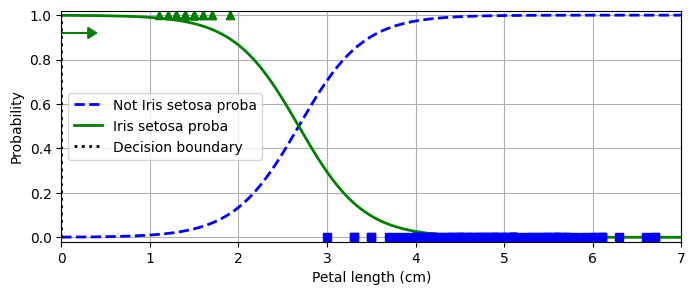

In [ ]:
X_new = np.linspace(0, 7, 1000).reshape(-1, 1)  # 크기를 바꾸어 열 벡터를 얻습니다.
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.figure(figsize=(8, 3))  # 추가 코드
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Not Iris setosa proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris setosa proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
         label="Decision boundary")

# 추가 코드 - 이 섹션에서는 그림 4-23을 꾸미고 저장합니다.
plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="g", ec="g")
plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")
plt.xlabel("Petal length (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis([0, 7, -0.02, 1.02])
plt.grid()

plt.show()

In [ ]:
#로지스틱 회귀 변형
X = iris.data[["petal length (cm)"]].values
y = iris.target_names[iris.target] == "virginica"
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train,y_train)

LogisticRegression(random_state=42)

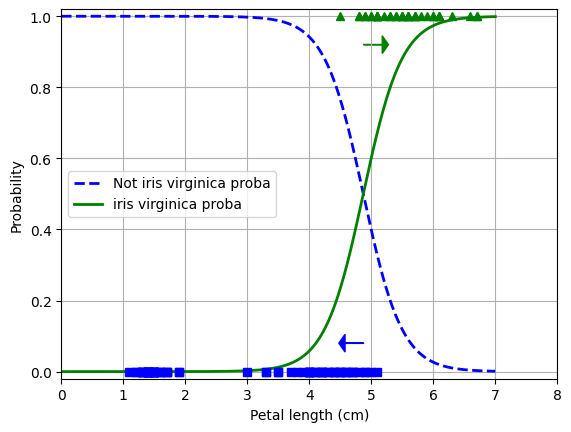

In [ ]:
X_new = np.linspace(0,7,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:,1] >= 0.5][0,0]

plt.plot(X_new,y_proba[:,0],"b--",linewidth=2, label="Not iris virginica proba")
plt.plot(X_new,y_proba[:,1],"g-",linewidth=2, label="iris virginica proba")


# 추가 코드 - 이 섹션에서는 그림 4-23을 꾸미고 저장합니다.
plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="g", ec="g")
plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")
plt.xlabel("Petal length (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis([0, 8, -0.02, 1.02])
plt.grid()

plt.show()

array([False,  True])

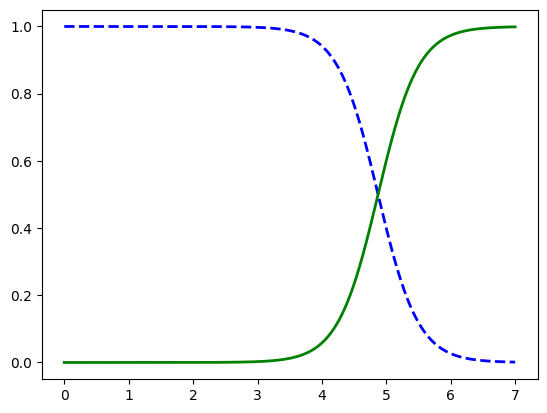

In [ ]:
X_new = np.linspace(0,7,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:,1] >= 0.5][0,0]

plt.plot(X_new,y_proba[:,0],"b--",linewidth=2, label="Not iris virginica proba")
plt.plot(X_new,y_proba[:,1],"g-",linewidth=2, label="iris virginica proba")
log_reg.classes_